In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/wine.csv')
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Target  
0                          3.92     1065       0  
1                          3.40     1050       0  
2                          3.17     1185       0  
3                          3.45     1480       0  
4                          2.93      735       0

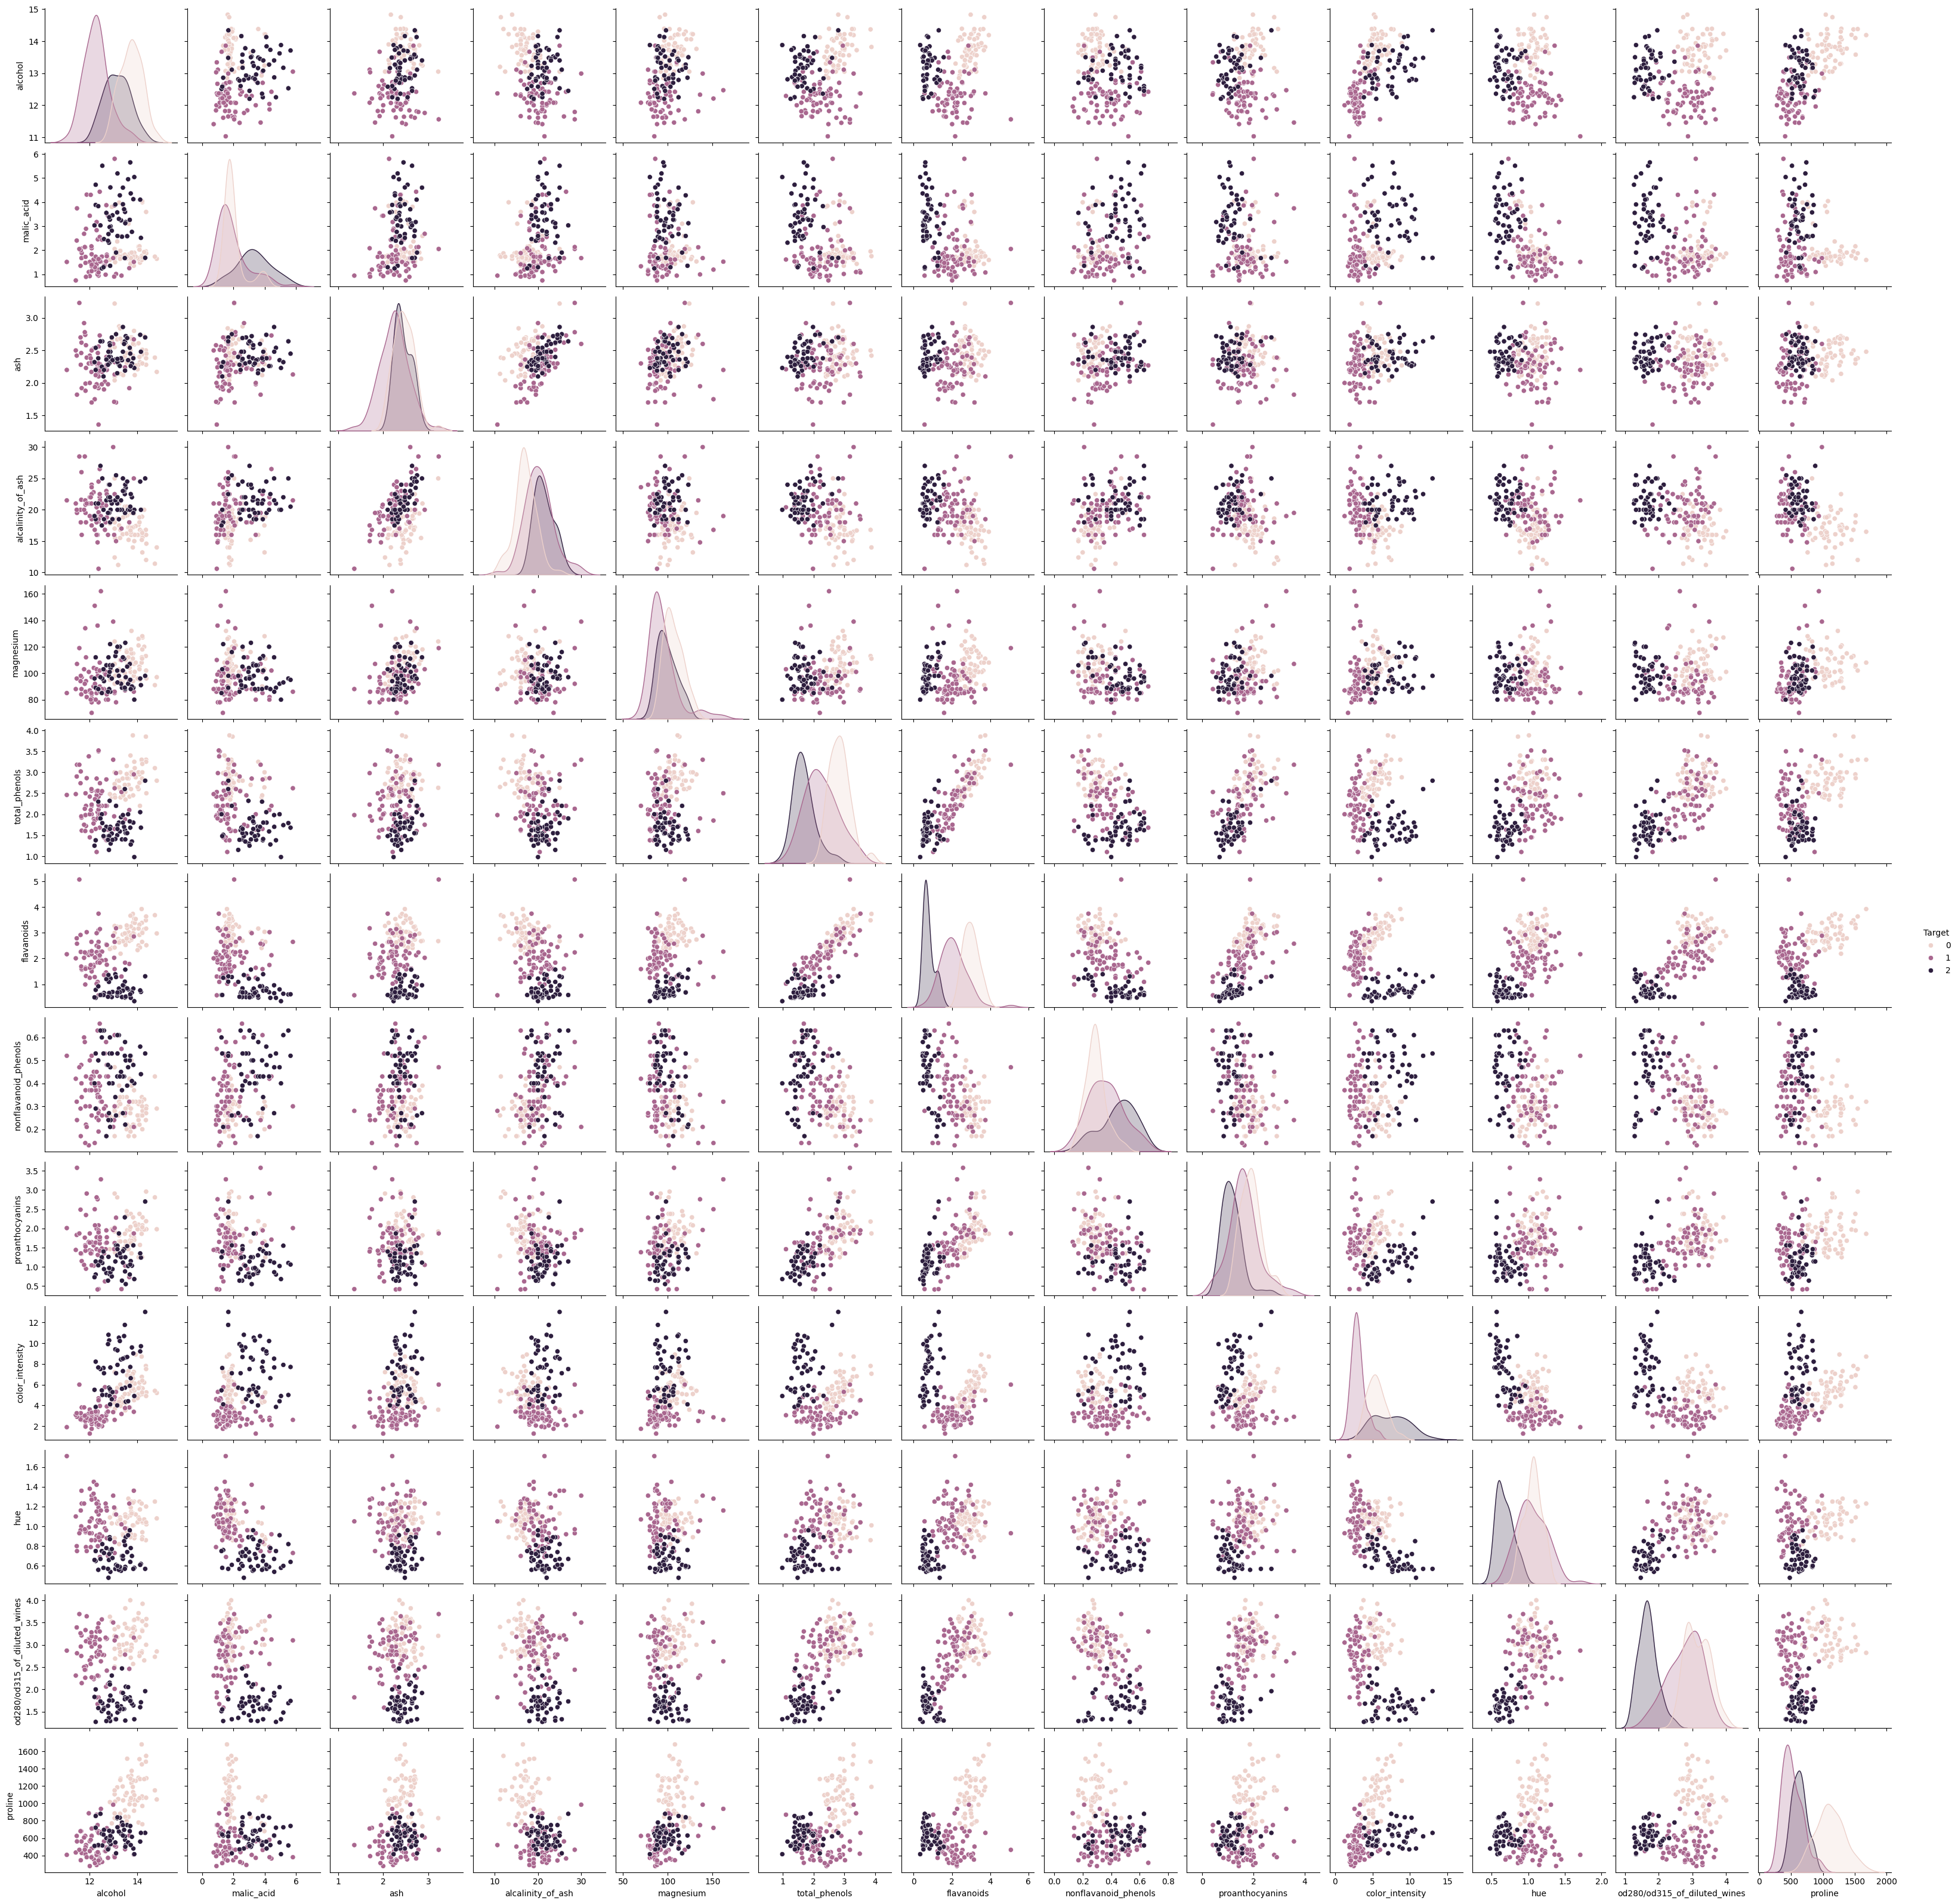

In [98]:
import seaborn as sns
sns.pairplot(df , hue = 'Target')

In [99]:
df['Target'].unique()

array([0, 1, 2])

In [100]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Target                          0
dtype: int64

In [101]:
X = df.drop(columns = 'Target')
y = df['Target']

In [102]:
X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92     1065  
1                          3.40     1050  
2                          3.17     1185  
3                          3.45     1480  
4                          2.93      735

In [103]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.75)

In [104]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(xtrain)
xtrainScaled = scaler.transform(xtrain)
xtestScaled = scaler.transform(xtest)


In [105]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

modelA = RandomForestClassifier(n_estimators = 100, max_depth = 2)
modelA.fit(xtrainScaled,ytrain)

RandomForestClassifier(max_depth=2)

In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(ytrain, modelA.predict(xtrainScaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      0.98      0.99        56
           2       0.97      1.00      0.99        34

    accuracy                           0.99       133
   macro avg       0.99      0.99      0.99       133
weighted avg       0.99      0.99      0.99       133



In [40]:
print(classification_report(ytest, modelA.predict(xtestScaled)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**Feature Reduction**

     - PCA - Principal component Analysis

In [108]:
X = df.drop(columns = 'Target')
y = df['Target']

In [42]:
X.shape

(178, 13)

In [43]:
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
Xs = scaler.transform(X)
'''

In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)

pca.fit(X)
X_pca = pca.transform(X)

In [110]:
print(pca.explained_variance_)

[9.92017895e+04 1.72535266e+02 9.43811370e+00 4.99117861e+00
 1.22884523e+00 8.41063869e-01 2.78973523e-01 1.51381266e-01
 1.12096765e-01 7.17026032e-02 3.75759789e-02 2.10723661e-02
 8.20370314e-03]


In [111]:
print(pca.explained_variance_ratio_)

[9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06 2.80681456e-06 1.52308053e-06
 1.12783044e-06 7.21415811e-07 3.78060267e-07 2.12013755e-07
 8.25392788e-08]


In [112]:
cum_sum = 0
for i in pca.explained_variance_ratio_:
    cum_sum = cum_sum + i
    print(cum_sum)

0.9980912304918974
0.9998271461166032
0.9999221050741547
0.9999723224303368
0.9999846861150248
0.99999314824536
0.9999959550599172
0.99999747814045
0.9999986059708893
0.9999993273867002
0.9999997054469667
0.9999999174607213
1.0


In [113]:
X_pca.shape

(178, 13)

In [114]:
X_pca

array([[ 3.18562979e+02,  2.14921307e+01, -3.13073470e+00, ...,
         8.87340044e-02, -3.85475626e-02,  8.02644337e-02],
       [ 3.03097420e+02, -5.36471768e+00, -6.82283550e+00, ...,
         3.97781862e-02, -5.71915771e-02,  1.35927465e-02],
       [ 4.38061133e+02, -6.53730945e+00,  1.11322298e+00, ...,
         2.37770027e-01, -4.87978751e-02, -3.54081623e-02],
       ...,
       [ 8.84580737e+01,  1.87762846e+01,  2.23757651e+00, ...,
        -2.23049341e-01,  9.60485020e-02,  3.61748954e-02],
       [ 9.34562419e+01,  1.86708191e+01,  1.78839152e+00, ...,
        -3.04078323e-02, -5.20893107e-02,  1.32759078e-01],
       [-1.86943190e+02, -2.13330803e-01,  5.63050984e+00, ...,
         1.60725068e-01,  3.19201764e-02,  2.69369989e-02]],
      shape=(178, 13))

In [117]:
Xnew = X_pca[:,0:3]
y = y.copy()

from sklearn.model_selection import train_test_split
xtrainP,xtestP,ytrainP,ytestP = train_test_split(Xnew,y,train_size=0.75)

#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

modelB = RandomForestClassifier(n_estimators = 100, max_depth = 3)
modelB.fit(xtrainP,ytrainP)

print(classification_report(ytrainP, modelB.predict(xtrainP)))
print()
print(classification_report(ytestP, modelB.predict(xtestP)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        47
           1       0.82      0.90      0.86        50
           2       0.84      0.72      0.78        36

    accuracy                           0.86       133
   macro avg       0.86      0.85      0.86       133
weighted avg       0.87      0.86      0.86       133


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      0.95      0.93        21
           2       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



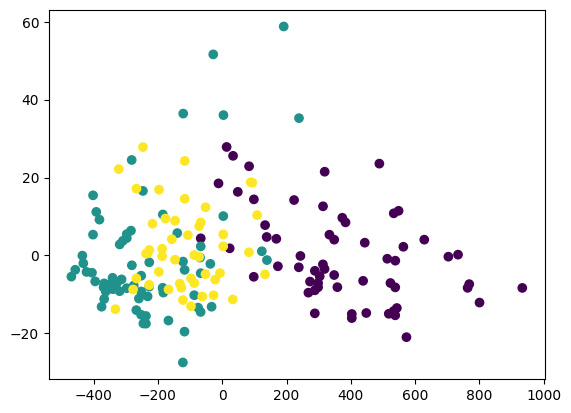

In [118]:
plt.scatter(Xnew[:,0],Xnew[:,1],c=y)
plt.show()

**PCA on Cancer tumor data**

In [64]:
d1 = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/Cancer_Data.csv')
d1.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [65]:
d1['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [70]:
d2 = d1.drop(columns = ['id','Unnamed: 32'])
d2.head(2)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38           122.8     1001.0   
1         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33            184.6   
1         0.1812  ...         24.99          23.41            158.8   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  

[2 rows x 31 columns]

In [71]:
d2.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [72]:
X = d2.drop(columns = 'diagnosis')
y = d2['diagnosis']

In [95]:
yc = y.map({"M":'r' , "B":'g'})
yc

0      r
1      r
2      r
3      r
4      r
      ..
564    r
565    r
566    r
567    r
568    g
Name: diagnosis, Length: 569, dtype: object

In [74]:
X.shape

(569, 30)

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
pca.fit(X)
Xpca = pca.transform(X)

In [90]:
pca.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473206e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577732e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849738e-10, 1.27487508e-10, 7.72682973e-11, 6.28357719e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

In [91]:
cum_sum = 0
for var_ratio in pca.explained_variance_ratio_:
    cum_sum = cum_sum +  var_ratio
    print(cum_sum)

0.9820446715106613
0.9982211613741726
0.9997786721191878
0.9998996040827279
0.9999878765363125
0.9999945253758249
0.9999985425126449
0.9999993645298415
0.9999997086651201
0.9999998946838415
0.9999999646311621
0.9999999812220501
0.9999999882184667
0.9999999930016498
0.999999995937142
0.9999999973539913
0.999999998183569
0.9999999987039748
0.9999999991124388
0.9999999994757521
0.9999999996486019
0.9999999997760893
0.9999999998533576
0.9999999999161934
0.9999999999519236
0.9999999999795631
0.9999999999877076
0.9999999999940097
0.9999999999984464
0.9999999999999998


In [76]:
Xpca.shape

(569, 30)

In [92]:
Xpca[:,0:2]

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]], shape=(569, 2))

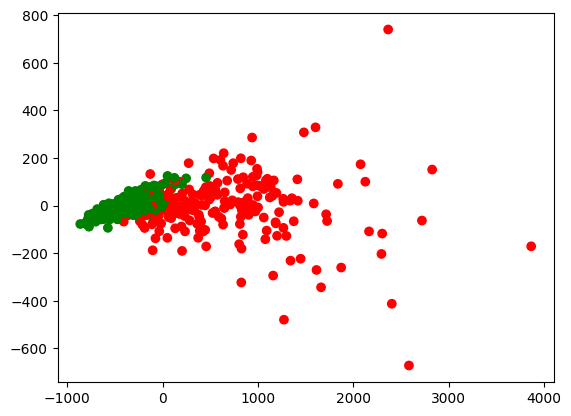

In [96]:
plt.scatter(Xpca[:,0] , Xpca[:,1] , c = yc)

plt.show()